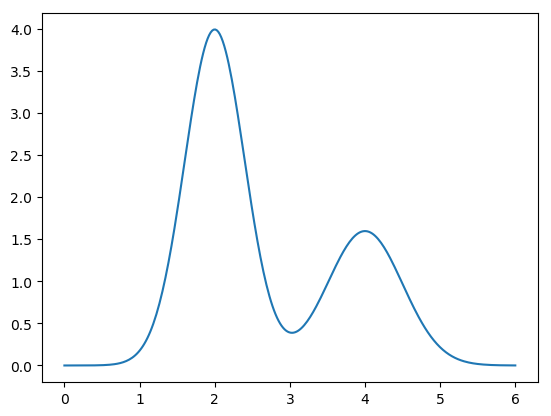

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x19e3d9240>

In [1]:
using PyCall
# import Pkg; Pkg.add("ApproxFun")
include("../src/gauss_error.jl")
include("../src/kernels.jl")

a = 0.
b = 6.

function phi(x::Float64)
    mu1 = 2.
    mu2 = 4.
    n1 = 4.
    n2 = 2.
    sig1 = 0.4
    sig2 = 0.5

    norm(n, mu, sig, x) = n / sqrt(2 * pi*sig^2) * exp(-(x - mu)^2 / (2 * sig^2))
    return norm(n1, mu1, sig1, x) + norm(n2, mu2, sig2, x)
end

x = collect(range(a, stop=b, length=300))

using PyPlot
myplot = plot(x, phi.(x))

In [2]:
kernel_name = "triangular"

function kernel(x::Float64, y::Float64)
    return getOpticsKernels(kernel_name)(x, y)
end

kernel (generic function with 1 method)

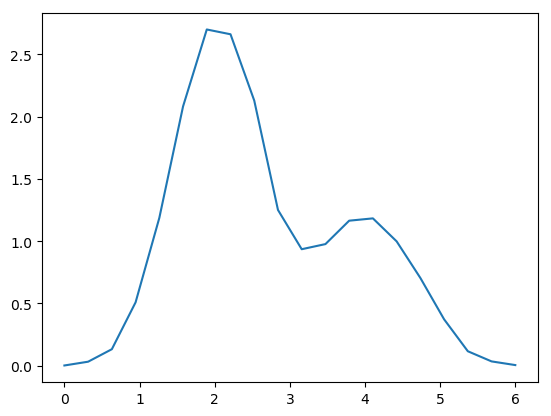

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x18f4e5358>

In [3]:
convolution = y -> quadgk(x -> kernel(x,y) * phi(x), a, b, rtol=10^-5, maxevals=10^7)[1]
y = collect(range(a, stop=b, length=20))
ftrue = convolution.(y)
sig = 0.05*ftrue + [0.01 for i = 1:Base.length(ftrue)]
using Compat, Random, Distributions
noise = []
for sigma in sig
    n = rand(Normal(0., sigma), 1)[1]
    push!(noise, n)
end
f = ftrue + noise
plot(y, f)

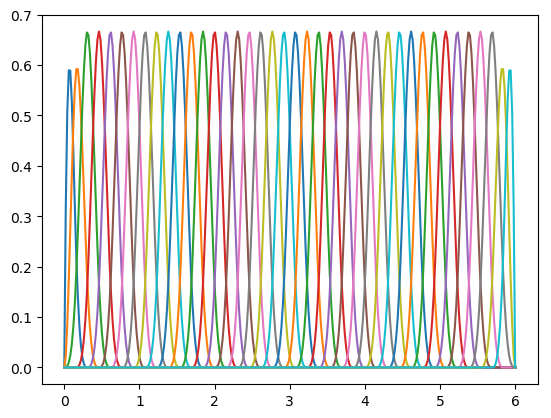

40


In [4]:
knots = collect(range(a, b, length=40))
basis = CubicSplineBasis(knots, ("dirichlet", "dirichlet"))
for basis_function in basis.basis_functions
    plot(x, basis_function.f.(x))
end
println(length(basis))

In [5]:
y = collect(range(a, stop=6, length=300))
plot(y, basis.basis_functions[1].f.(y))
# for z in collect(range(a, stop=6, length=300))
#     println(z, " ", basis.basis_functions[3].f(z))
# end

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a200ce48>

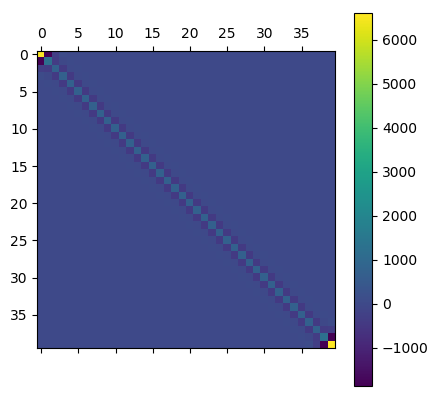

40

PyObject <matplotlib.colorbar.Colorbar object at 0x1a223a940>

In [6]:
print(length(basis))
my_omega = omega(basis, 2)[1]
# for i = 1:size(my_omega)[1]
#     for j = 1:size(my_omega)[1]
#         my_omega[i, j] = abs(my_omega[i, j])
#     end
# end
matshow(my_omega)
colorbar()

In [7]:
include("src/b_spline_implementation.jl")

ErrorException: could not open file /Users/ta_nyan/Documents/phystech/statreg/examples/src/b_spline_implementation.jl

In [8]:
knots = collect(range(a, b, length=40))
my_knots = [0.0, 0.0, 0.0, 0.0, 0.153846, 0.307692, 0.461538, 0.615385, 0.769231, 0.923077, 1.07692, 1.23077, 1.38462, 1.53846, 1.69231, 1.84615, 2.0, 2.15385, 2.30769, 2.46154, 2.61538, 2.76923, 2.92308, 3.07692, 3.23077, 3.38462, 3.53846, 3.69231, 3.84615, 4.0, 4.15385, 4.30769, 4.46154, 4.61538, 4.76923, 4.92308, 5.07692, 5.23077, 5.38462, 5.53846, 5.69231, 5.84615, 6.0, 6.0, 6.0, 6.0]
my_b_spline = BSpline(3, 3, knots)

BSpline(3, 3, [0.0, 0.153846, 0.307692, 0.461538, 0.615385, 0.769231, 0.923077, 1.07692, 1.23077, 1.38462  …  4.61538, 4.76923, 4.92308, 5.07692, 5.23077, 5.38462, 5.53846, 5.69231, 5.84615, 6.0], getfield(Main, Symbol("##41#43")){Int64,Int64,Array{Float64,1}}(3, 3, [0.0, 0.153846, 0.307692, 0.461538, 0.615385, 0.769231, 0.923077, 1.07692, 1.23077, 1.38462  …  4.61538, 4.76923, 4.92308, 5.07692, 5.23077, 5.38462, 5.53846, 5.69231, 5.84615, 6.0], Core.Box(getfield(Main, Symbol("#b_spline_function#42"))(Core.Box(#= circular reference @-2 =#)))))

In [9]:
my_b_spline_func = my_b_spline.func

#41 (generic function with 1 method)

In [10]:
# import Pkg;
# Pkg.rm()
# Pkg.add("Calculus")
using Calculus

y = collect(range(a, stop=6, length=300))
plot(y, my_b_spline_func.(y))
der = [derivative(my_b_spline, y1, 2)^2 for y1 in y]
# der1 = [Calculus.second_derivative(my_b_spline_func, y1)^2 for y1 in y]
plot(y, der)
# plot(y, der1)

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1a25106d8>

In [11]:
res = quadgk(y -> derivative(my_b_spline, y, 2)^2, a, b, rtol=10^-5, maxevals=10^7)[1]

732.3313349991764

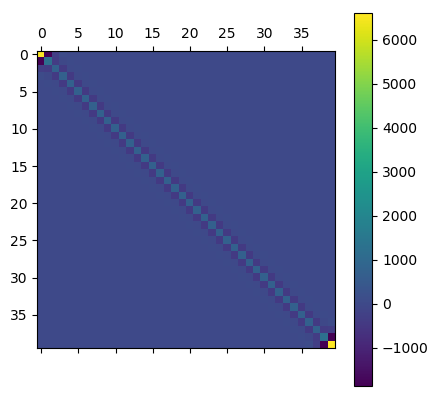

PyObject <matplotlib.colorbar.Colorbar object at 0x1a27a3fd0>

In [12]:
knots = collect(range(a, b, length=40))
basis = CubicSplineBasis(knots, ("dirichlet", "dirichlet"))
my_omega = omega(basis, 2)[1]
matshow(my_omega)
colorbar()

In [13]:
my_omega[3, 3]

732.3333334783302

In [14]:
for i in collect(1:20)
    println(i, " ", my_omega[i, i+1])
end

1 -1853.7187458494539
2 -366.16666664172635
3 -411.93749952689444
4 -411.9374989459474
5 -411.937498791443
6 -411.9374983297114
7 -411.9374889035304
8 -411.93749444527026
9 -411.9374984707518
10 -411.9374986959571
11 -411.9374862094829
12 -411.9374875571455
13 -411.9374944260231
14 -411.9374962710528
15 -411.937497445389
16 -411.937495698569
17 -411.9374978002996
18 -411.93749924065423
19 -411.93749461173104
20 -411.9374944964086


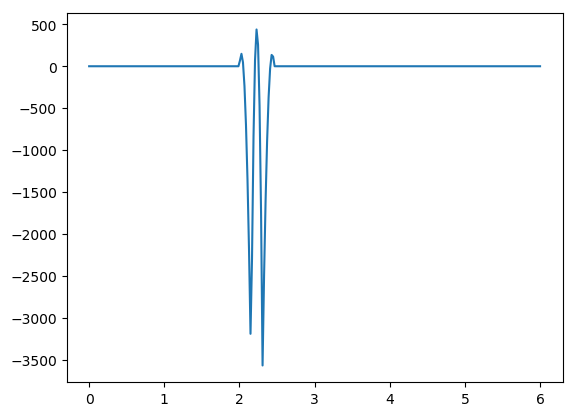

-411.9356538348601

In [15]:
my_b_spline1 = BSpline(12, 3, knots)
my_b_spline2 = BSpline(13, 3, knots)

y = collect(range(a, stop=6, length=300))
# plot(y, my_b_spline1.func.(y))
# plot(y, my_b_spline2.func.(y))
der = [derivative(my_b_spline1, y1, 2)*derivative(my_b_spline2, y1, 2) for y1 in y]
plot(y, der)
res = quadgk(y -> derivative(my_b_spline1, y, 2)*derivative(my_b_spline2, y, 2), a, b, rtol=10^-5, maxevals=10^7)[1]

In [16]:
n = 20
omega1 = zeros(Float64, n, n)
for i in collect(10:20)
     for j in collect(10:20)
        my_b_spline1 = BSpline(i, 3, knots)
        my_b_spline2 = BSpline(j, 3, knots)

        y = collect(range(a, stop=6, length=300))
        der = [derivative(my_b_spline1, y1, 2)*derivative(my_b_spline2, y1, 2) for y1 in y]
        res = quadgk(y -> derivative(my_b_spline1, y, 2)*derivative(my_b_spline2, y, 2), a, b, rtol=10^-5, maxevals=10^4)[1]
        omega1[i, j] = res
    end
end
        

In [17]:
matshow(omega1)
colorbar()

PyObject <matplotlib.colorbar.Colorbar object at 0x1a285f470>

In [18]:
for i in collect(10:19)
    println(i, " ", omega1[i, i+1])
end

10 -411.937126465775
11 0.0
12 -411.9356538348601
13 -411.9364106426413
14 -411.9362892022166
15 0.0
16 -411.9359748602109
17 -411.93559367590524
18 -411.9359748602109
19 0.0


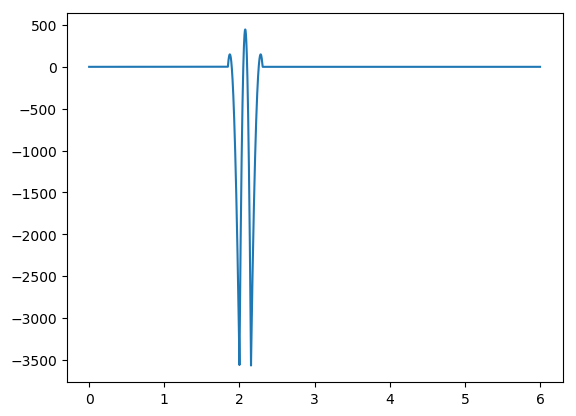

(0.0, 0.0)

In [19]:
i = 11
j = 12
my_b_spline1 = BSpline(i, 3, knots)
my_b_spline2 = BSpline(j, 3, knots)

y = collect(range(a, stop=6, length=30000))
function my_der(y2)
    return derivative(my_b_spline1, y2, 2)*derivative(my_b_spline2, y2, 2)
end
der = [my_der(y3) for y3 in y]
plot(y, der)
res = quadgk(y4 -> my_der(y4), 0, 6, rtol=10^-5, maxevals=10^6)

In [20]:
s = 0
for x in collect(range(0, stop=6, length=10^6))
    y = my_der2(x)
    s += (y * 6 / 10^6)
end
println(s)

UndefVarError: UndefVarError: my_der2 not defined

In [21]:
function my_der2(y2)
    println("iter")
    return derivative(my_b_spline1, y2, 2)*derivative(my_b_spline2, y2, 2)
end

my_der2 (generic function with 1 method)

In [22]:
println(quadgk(my_der2, 0, 6, order=100))

iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter


iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter


iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter


iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter


iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter


iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter


In [23]:
println(quadgk(my_der2, 0, 6))#, rtol=10^-5, maxevals=10^6))
# println(quadgk(my_der2, 0, 1.8))
# println(quadgk(my_der2, 1.8, 2.5))
# println(quadgk(my_der2, 2.5, 6))

iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
(0.0, 0.0)


In [24]:
println(quadgk(my_der2, 0, 6))

iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
iter
(0.0, 0.0)
